<a href="https://colab.research.google.com/github/JVR27XD/MobileSAM/blob/main/FastSAMTFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 1329, done.
remote: Counting objects: 100% (401/401), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 1329 (delta 346), reused 307 (delta 307), pack-reused 928 (from 1)
Receiving objects: 100% (1329/1329), 72.56 MiB | 29.73 MiB/s, done.
Resolving deltas: 100% (542/542), done.


In [ ]:
!nvidia-smi

Sun Jun 29 16:17:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!wget https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt

--2025-06-29 16:17:06--  https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
Resolving huggingface.co (huggingface.co)... 18.239.50.16, 18.239.50.49, 18.239.50.103, ...
Connecting to huggingface.co (huggingface.co)|18.239.50.16|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/71/c3/71c3ec5a83f3fc374665cec9240f614262e29088fca1a18732571e13c7084f1b/c0be4e7ddbe4c15333d15a859c676d053c486d0a746a3be6a7a9790d52a9b6d7?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27FastSAM.pt%3B+filename%3D%22FastSAM.pt%22%3B&Expires=1751217426&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc1MTIxNzQyNn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy83MS9jMy83MWMzZWM1YTgzZjNmYzM3NDY2NWNlYzkyNDBmNjE0MjYyZTI5MDg4ZmNhMWExODczMjU3MWUxM2M3MDg0ZjFiL2MwYmU0ZTdkZGJlNGMxNTMzM2QxNWE4NTljNjc2ZDA1M2M0ODZkMGE3NDZhM2JlNmE3YTk3OTBkNTJhOWI2ZDc%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvb

In [ ]:
!pip install -r FastSAM/requirements.txt
!pip install git+https://github.com/openai/CLIP.git

INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

In [ ]:
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg

--2025-06-29 16:18:45--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99846 (98K) [image/jpeg]
Saving to: ‘images/dog.jpg’

dog.jpg             100%[===================>]  97.51K  --.-KB/s    in 0.009s  

2025-06-29 16:18:46 (10.3 MB/s) - ‘images/dog.jpg’ saved [99846/99846]



In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
image = cv2.imread('images/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

800 534


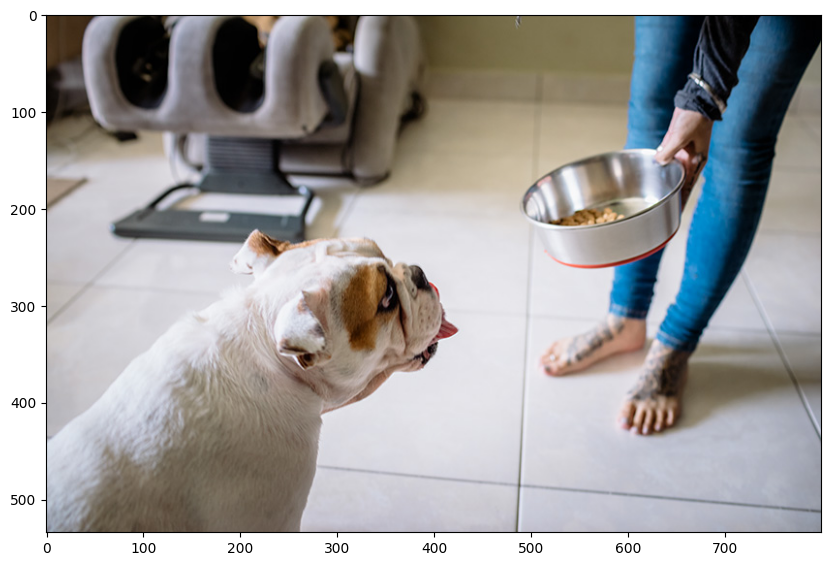

In [ ]:
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.imshow(image)

In [ ]:
pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [ ]:
!pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.7/839.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 115.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 129.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/20

In [ ]:
pip install matplotlib==3.7.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 109.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!python FastSAM/Inference.py  --model_path FastSAM.pt --img_path ./images/dog.jpg --imgsz 1024

2025-06-29 16:23:23.517647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751214203.534144    2836 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751214203.538964    2836 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

0: 704x1024 35 objects, 117.8ms
Speed: 5.3ms preprocess, 117.8ms inference, 122.4ms postprocess per image at shape (1, 3, 1024, 1024)


In [ ]:
!python FastSAM/Inference.py  --model_path /content/FastSAM-s.pt --img_path ./images/dog.jpg --imgsz 640

2025-06-29 16:23:35.083902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751214215.102290    2917 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751214215.108131    2917 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

0: 448x640 33 objects, 80.6ms
Speed: 4.1ms preprocess, 80.6ms inference, 133.4ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
!python FastSAM/Inference.py \
  --model_path /content/FastSAM-x.pt \
  --img_path /content/FastSAM/images/dogs.jpg\
  --imgsz 640 \
  --device cuda \

# Mostrar la imagen generada automáticamente
import os
from IPython.display import Image, display

for root, dirs, files in os.walk("/content/FastSAM/runs"):
    for file in files:
        if file.lower().endswith(('.jpg', '.png')):
            output_path = os.path.join(root, file)
            print(f"✅ Imagen procesada: {output_path}")
            display(Image(filename=output_path))
            break

2025-06-29 16:25:41.411700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751214341.427885    3637 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751214341.432792    3637 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

0: 384x640 14 objects, 81.3ms
Speed: 3.9ms preprocess, 81.3ms inference, 98.6ms postprocess per image at shape (1, 3, 640, 640)


1072 603


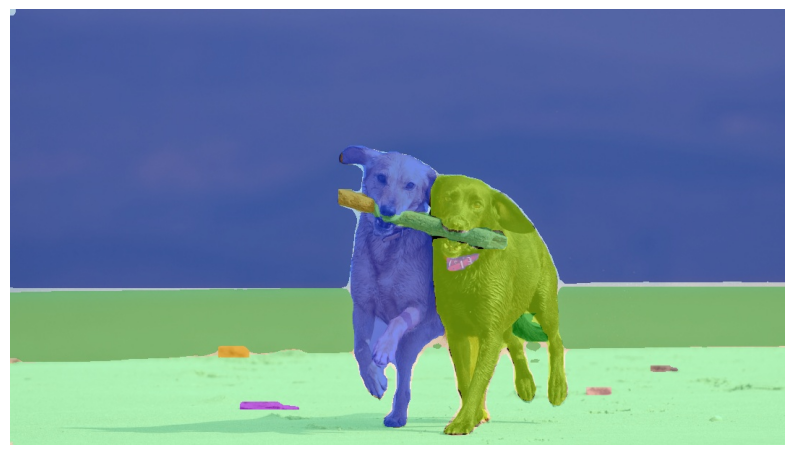

In [ ]:
image = cv2.imread('output/dogs.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

In [ ]:
!python FastSAM/Inference.py --model_path FastSAM.pt --img_path /content/FastSAM/images/dogs.jpg --imgsz 720


2025-06-29 16:26:15.544204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751214375.561082    3814 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751214375.565995    3814 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

WARNING ⚠️ imgsz=[720] must be multiple of max stride 32, updating to [736]
0: 416x736 19 objects, 77.6ms
Speed: 3.9ms preprocess, 77.6ms inference, 106.9ms postprocess per image at shape (1, 3, 736, 736)


1072 603


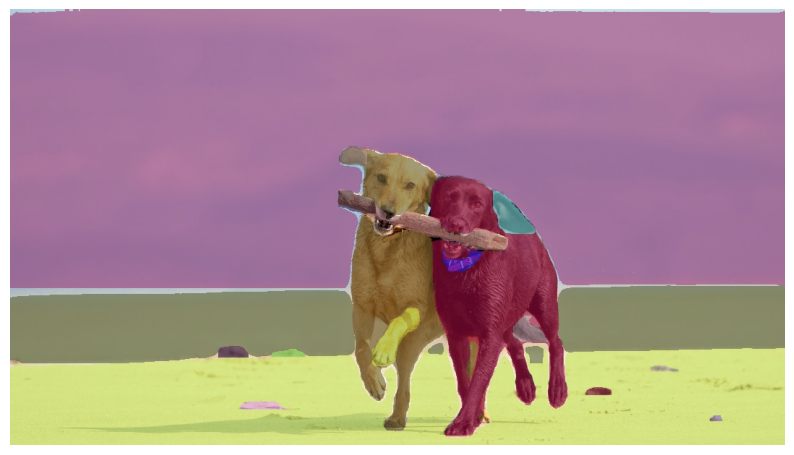

In [ ]:
image = cv2.imread('output/dogs.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

In [ ]:
!python FastSAM/Inference.py --model_path FastSAM.pt --img_path /content/FastSAM/images/dogs.jpg --point_prompt "[[520,360],[620,300],[520,300],[620,360]]" \--point_label "[1,0,1,0]"


2025-06-29 16:26:27.247929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751214387.266043    3897 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751214387.271391    3897 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

0: 576x1024 21 objects, 93.2ms
Speed: 5.1ms preprocess, 93.2ms inference, 106.8ms postprocess per image at shape (1, 3, 1024, 1024)


1072 603


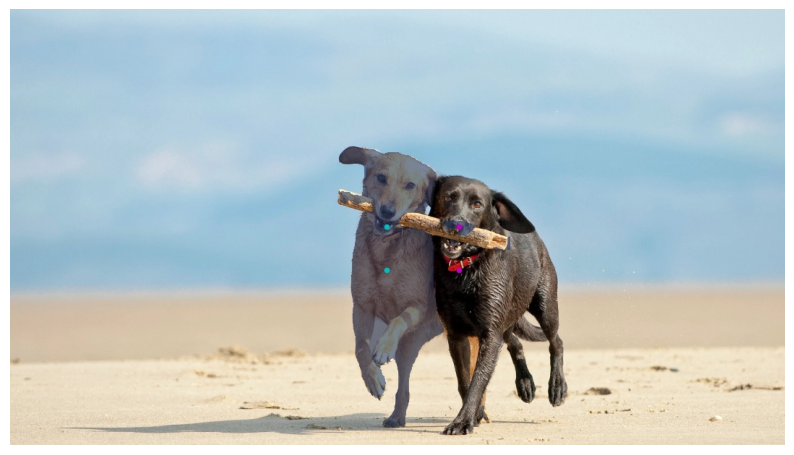

In [ ]:
image = cv2.imread('output/dogs.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

In [ ]:
!python FastSAM/Inference.py \
  --model_path FastSAM.pt \
  --img_path /content/FastSAM/images/dogs.jpg \
  --point_prompt "[[620,360]]" \
  --point_label "[1]" \
  --withContours True \
  --better_quality True

2025-06-29 16:26:39.485814: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751214399.502892    3980 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751214399.507943    3980 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

0: 576x1024 21 objects, 94.6ms
Speed: 5.6ms preprocess, 94.6ms inference, 102.9ms postprocess per image at shape (1, 3, 1024, 1024)


1072 603


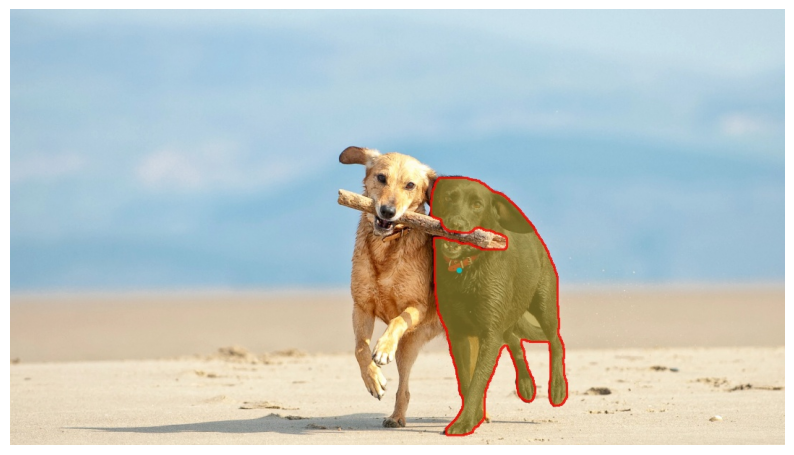

In [ ]:
image = cv2.imread('output/dogs.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

In [ ]:
!python FastSAM/Inference.py \
  --model_path FastSAM.pt \
  --img_path /content/FastSAM/images/dogs.jpg \
  --box_prompt "[[570,200,230,400]]"

2025-06-29 16:26:52.074818: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751214412.091679    4067 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751214412.096496    4067 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

0: 576x1024 21 objects, 93.6ms
Speed: 5.2ms preprocess, 93.6ms inference, 116.0ms postprocess per image at shape (1, 3, 1024, 1024)


1072 603


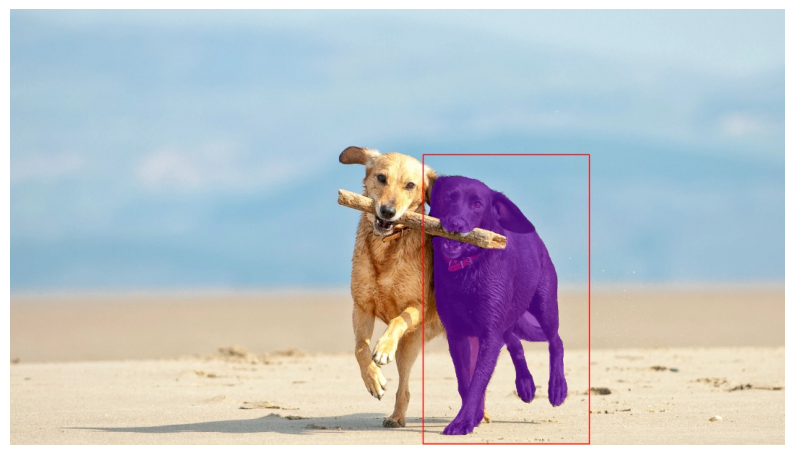

In [ ]:
image = cv2.imread('output/dogs.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

In [ ]:
!pip install huggingface_hub


In [ ]:
from huggingface_hub import snapshot_download

# Descarga el dataset completo a tu espacio Colab
snapshot_download(
    repo_id="keremberke/pcb-defect-segmentation",
    repo_type="dataset",
    local_dir="/content/pcb-defect-segmentation",
    local_dir_use_symlinks=False
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:980: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

test.zip:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

README.dataset.txt:   0%|          | 0.00/124 [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

valid.zip:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

valid-mini.zip:   0%|          | 0.00/155k [00:00<?, ?B/s]

train.zip:   0%|          | 0.00/6.41M [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

README.roboflow.txt:   0%|          | 0.00/873 [00:00<?, ?B/s]

pcb-defect-segmentation.py: 0.00B [00:00, ?B/s]

thumbnail.jpg:   0%|          | 0.00/159k [00:00<?, ?B/s]

split_name_to_num_samples.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

'/content/pcb-defect-segmentation'

In [ ]:
import zipfile

base_path = "/content/pcb-defect-segmentation/data/"

# Descomprimir train
with zipfile.ZipFile(base_path + "train.zip", 'r') as zip_ref:
    zip_ref.extractall(base_path + "train/")

# Descomprimir valid
with zipfile.ZipFile(base_path + "valid.zip", 'r') as zip_ref:
    zip_ref.extractall(base_path + "valid/")

# Descomprimir test
with zipfile.ZipFile(base_path + "test.zip", 'r') as zip_ref:
    zip_ref.extractall(base_path + "test/")

print("✅ Todos los splits descomprimidos.")


✅ Todos los splits descomprimidos.


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Imagen: {'id': 4, 'license': 1, 'file_name': 'WIN_20221102_19_30_08_Pro_jpg.rf.2689f4baabba3bcafe3fda40f88ca891.jpg', 'height': 480, 'width': 640, 'date_captured': '2023-01-27T13:45:08+00:00'}


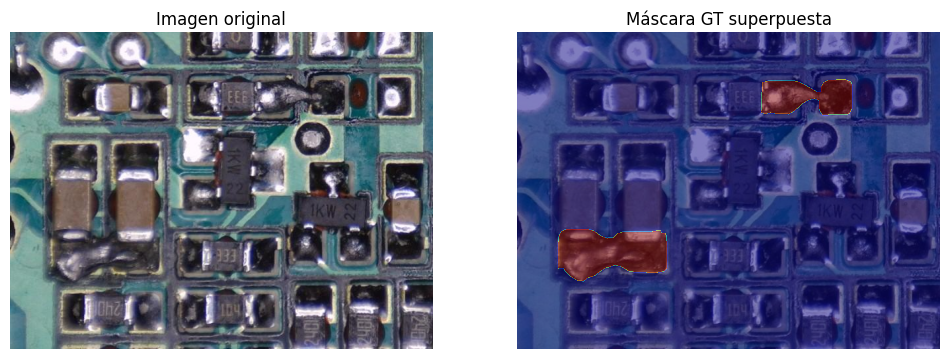

In [ ]:
import json
import os
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Ruta a tu archivo anotaciones COCO
ann_file = "/content/pcb-defect-segmentation/data/train/_annotations.coco.json"
img_dir = "/content/pcb-defect-segmentation/data/train/"

# Cargar COCO
coco = COCO(ann_file)

# Elegir una imagen
img_id = coco.getImgIds()[4]
img_info = coco.loadImgs(img_id)[0]
print("Imagen:", img_info)

# Cargar imagen real
img_path = os.path.join(img_dir, img_info['file_name'])
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Obtener anotaciones de esa imagen
ann_ids = coco.getAnnIds(imgIds=img_id)
anns = coco.loadAnns(ann_ids)

# Crear máscara combinada
h, w = img_info['height'], img_info['width']
gt_mask = np.zeros((h, w), dtype=np.uint8)

for ann in anns:
    rle = coco.annToRLE(ann)
    m = maskUtils.decode(rle)
    gt_mask = np.logical_or(gt_mask, m)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(image)
plt.imshow(gt_mask, cmap='jet', alpha=0.5)
plt.title("Máscara GT superpuesta")
plt.axis("off")
plt.show()

In [ ]:


import torch
import cv2
import matplotlib.pyplot as plt
from segment_anything import FastSAM, FastSAMPrompt

# --- Tu imagen ---
img_path = "/content/pcb-defect-segmentation/data/train/WIN_20221017_18_46_59_Pro_jpg.rf.d0b0eb817561f640234856f44b206faa.jpg"

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("Imagen cargada:", image.shape)


ModuleNotFoundError: No module named 'segment_anything'